In [15]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import plotly.express as px
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [16]:
# import csv file
df = pd.read_excel("cosmetic_dataset.xlsx")

In [17]:

df.shape

(10322, 10)

In [18]:
df.head(1)

,product_name,website,country,category,subcategory,price,brand,form,color,rating
0,"Carlton London Incense Eau da parfum, Premium ...",Flipkart,India,body,perfume,599.0,Carlton London,aerosol,"Top Note: Orange Blossom, Blackberry | Heart N...",3.9


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10322 entries, 0 to 10321
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  10322 non-null  object 
 1   website       10322 non-null  object 
 2   country       10322 non-null  object 
 3   category      10322 non-null  object 
 4   subcategory   10322 non-null  object 
 5   price         10322 non-null  float64
 6   brand         10322 non-null  object 
 7   form          10322 non-null  object 
 8   color         10322 non-null  object 
 9   rating        8504 non-null   float64
dtypes: float64(2), object(8)
memory usage: 806.5+ KB


In [20]:
df.isnull().sum()

product_name       0
website            0
country            0
category           0
subcategory        0
price              0
brand              0
form               0
color              0
rating          1818
dtype: int64

In [21]:
df1=df.dropna()

In [22]:
df1.head(1)

,product_name,website,country,category,subcategory,price,brand,form,color,rating
0,"Carlton London Incense Eau da parfum, Premium ...",Flipkart,India,body,perfume,599.0,Carlton London,aerosol,"Top Note: Orange Blossom, Blackberry | Heart N...",3.9


In [23]:
df1.shape

(8504, 10)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8504 entries, 0 to 10321
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  8504 non-null   object 
 1   website       8504 non-null   object 
 2   country       8504 non-null   object 
 3   category      8504 non-null   object 
 4   subcategory   8504 non-null   object 
 5   price         8504 non-null   float64
 6   brand         8504 non-null   object 
 7   form          8504 non-null   object 
 8   color         8504 non-null   object 
 9   rating        8504 non-null   float64
dtypes: float64(2), object(8)
memory usage: 730.8+ KB


In [25]:
df1.describe()

,price,rating
count,8504.000000,8504.000000
mean,2242.436435,19.504810
std,2843.960402,424.860475
min,15.980000,1.000000
25%,599.000000,3.900000
50%,1550.000000,4.200000
75%,2859.500000,4.500000
max,94099.000000,19721.000000


In [26]:
df1.isnull().sum()

product_name    0
website         0
country         0
category        0
subcategory     0
price           0
brand           0
form            0
color           0
rating          0
dtype: int64

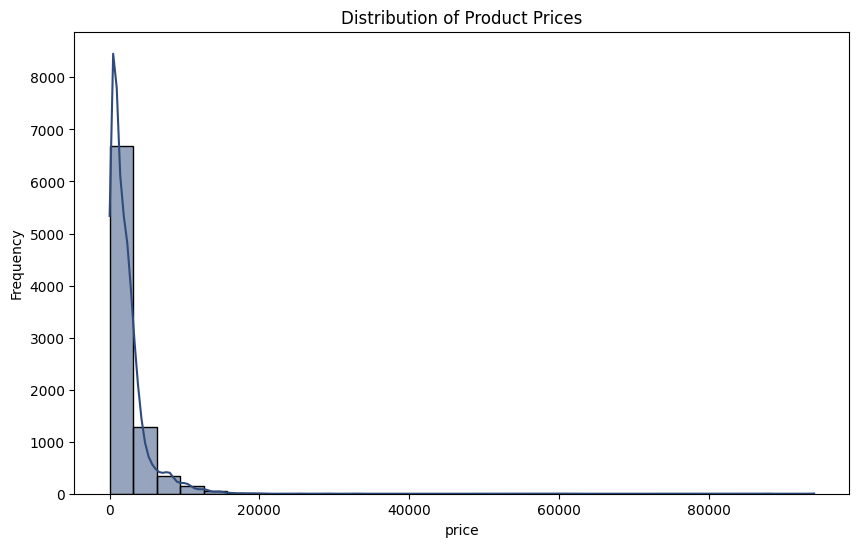

In [27]:
#Distribution of Product Prices
plt.figure(figsize=(10, 6))
sns.histplot(df1['price'], bins=30, kde=True, color='#2f4b7c')
plt.title('Distribution of Product Prices')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

 The price distribution appears to be skewed to the right (positively skewed), meaning that while most products are priced lower, there are a few products with significantly higher prices.

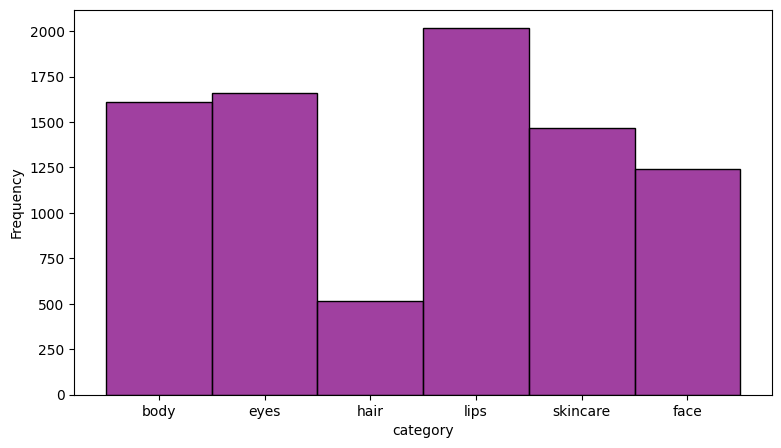

In [28]:
#Distribution of Product Category
plt.figure(figsize=(9,5))
sns.histplot(df1['category'], color="purple")
plt.xlabel('category')
plt.ylabel('Frequency')
plt.show()

 The chart shows the frequency distribution of various product categories. Notably, "lips" and "eyes" categories are the most represented, while "hair" and "face" categories have lower frequencies. This suggests that products related to lips and eyes might dominate the market or are more frequently stocked, while those for hair and face are less common.

In [29]:
#Distribution of Product Ratings
plt.figure(figsize=(9,5))
sns.histplot(df1['rating'], color="teal")
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

The  chart illustrates the distribution of product ratings. A significant concentration of ratings around 4 and 5 suggests that most products are highly rated by customers, indicating a general satisfaction with the products available.

<module 'matplotlib.pyplot' from 'c:\\python 3112\\Lib\\site-packages\\matplotlib\\pyplot.py'>

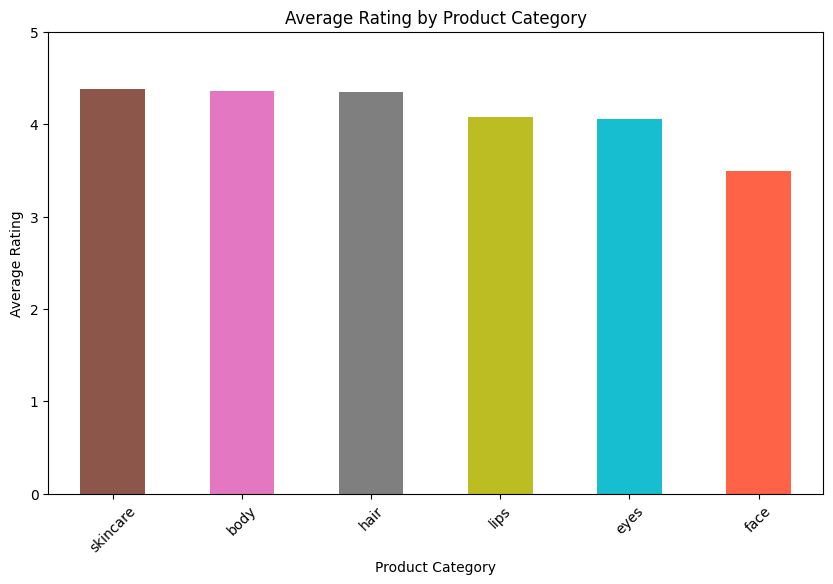

In [ ]:
# Calculate the average rating for each product category
category_avg_ratings = df1.groupby('category')['rating'].mean().sort_values(ascending=False)

# Convert the Series to a DataFrame for Seaborn
category_avg_ratings_df = category_avg_ratings.reset_index()
 
colors = [  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#FF6347', '#40E0D0', '#FFD700', '#FF69B4', '#8A2BE2']
# Visualization with Matplotlib
plt.figure(figsize=(10, 6))
category_avg_ratings.plot(kind='bar', color=colors)
plt.title('Average Rating by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt

Most product categories maintain a high average rating, around 4 to 4.5, indicating general customer satisfaction across these categories.
The Face category has the lowest average rating, which may suggest room for improvement in product quality or customer satisfaction in this area.

<module 'matplotlib.pyplot' from 'c:\\python 3112\\Lib\\site-packages\\matplotlib\\pyplot.py'>

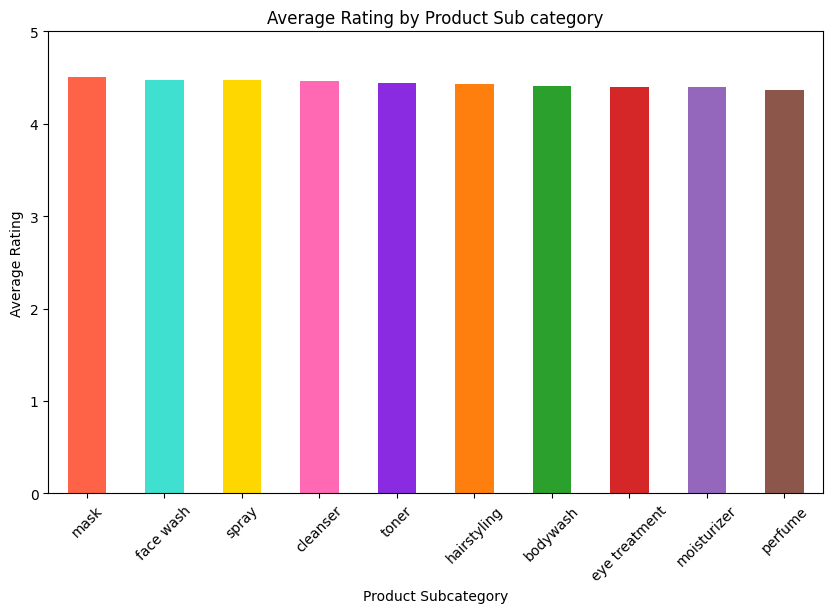

In [ ]:
# Calculate the average rating for each product category
productcategory_avg_ratings = df1.groupby('subcategory')['rating'].mean().sort_values(ascending=False).head(10)

# Convert the Series to a DataFrame for Seaborn
productcategory_avg_ratings_df = productcategory_avg_ratings.reset_index()
 
colo = ['#FF6347', '#40E0D0', '#FFD700', '#FF69B4', '#8A2BE2','#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
# Visualization with Matplotlib
plt.figure(figsize=(10, 6))
productcategory_avg_ratings.plot(kind='bar', color=colo)
plt.title('Average Rating by Product Sub category')
plt.xlabel('Product Subcategory')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt

The average ratings across different product subcategories are consistently high, with all ratings close to 5. This indicates that the products in these subcategories are generally well-received by customers.

C:\Windows\Temp\ipykernel_20160\539149230.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values,palette="magma")


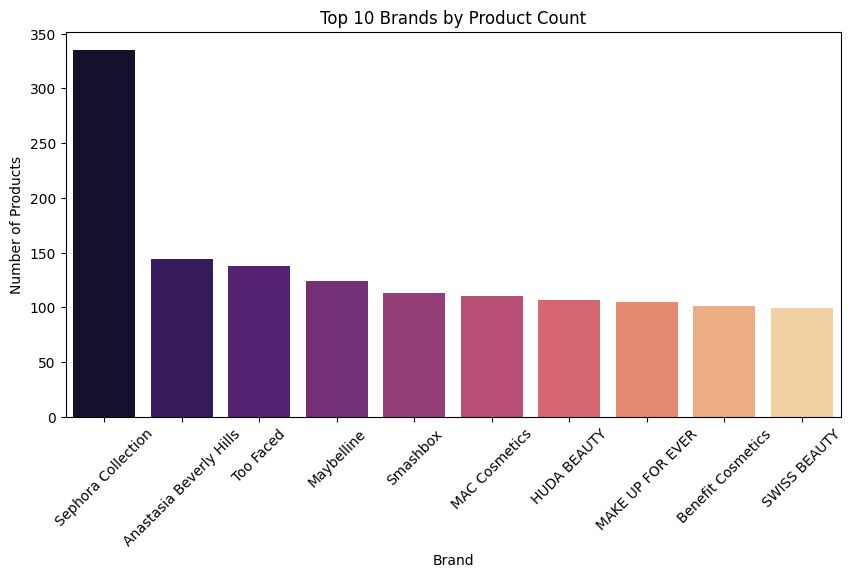

In [ ]:
# Top Brands by Product Count
top_brands = df1['brand'].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_brands.index, y=top_brands.values,palette="magma")
plt.title('Top 10 Brands by Product Count')
plt.ylabel('Number of Products')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.show()

Sephora Collection has the highest number of products, significantly more than other brands, followed by Anastasia Beverly Hills, Too Faced, and Maybelline. This suggests that Sephora has a more extensive product line compared to other brands.

C:\Windows\Temp\ipykernel_20160\3691519396.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=form_distribution.index, y=form_distribution.values, palette="Set2")


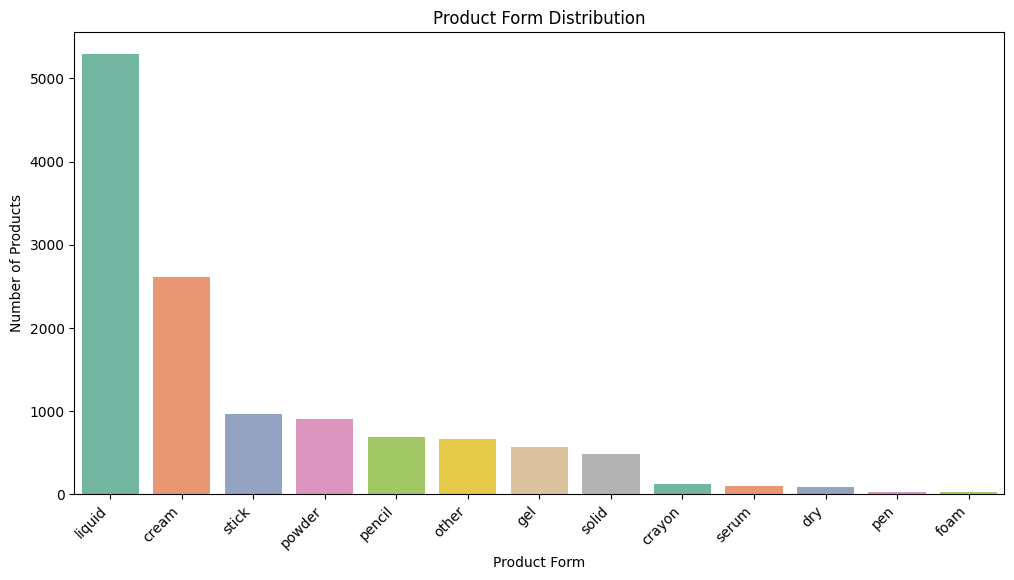

In [ ]:

# Calculate the distribution of product forms
form_distribution = df1['form'].value_counts()

# Plot: Product Form Distribution as a Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=form_distribution.index, y=form_distribution.values, palette="Set2")
plt.title('Product Form Distribution')
plt.xlabel('Product Form')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.show()


Liquid products dominate the market with the highest count, followed by cream and stick forms. This shows that liquid forms are the most popular or widely available in the cosmetics industry.

C:\Windows\Temp\ipykernel_20160\961943583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_colors.index, y=top_colors.values ,palette="viridis")


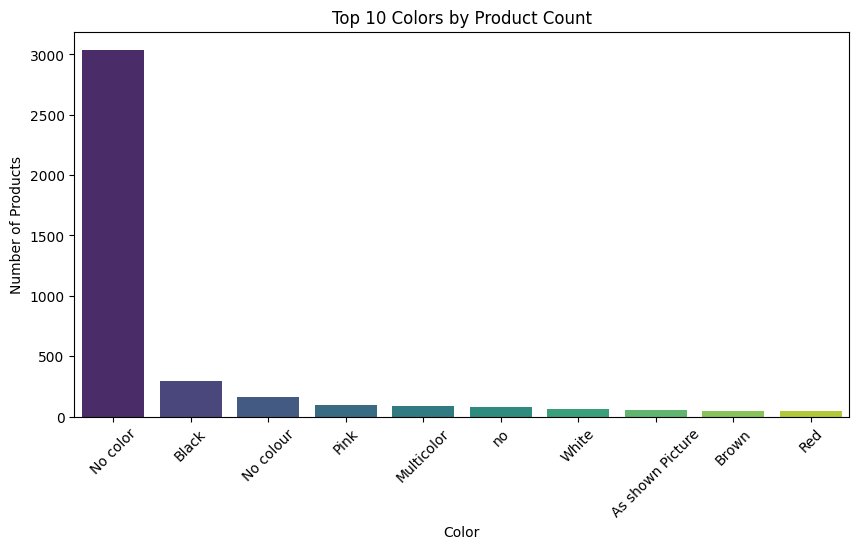

In [ ]:
#  Top Colors by Product Count
top_colors = df1['color'].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_colors.index, y=top_colors.values ,palette="viridis")
plt.title('Top 10 Colors by Product Count')
plt.ylabel('Number of Products')
plt.xlabel('Color')
plt.xticks(rotation=45)
plt.show()

A majority of products are listed under "No color," with a few products in black, pink, and multicolor categories. This could imply that many cosmetic products either don’t have a color specification or are categorized as such for various reasons.

C:\Windows\Temp\ipykernel_20160\3799620359.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='price', y='rating', data=df, palette="viridis")


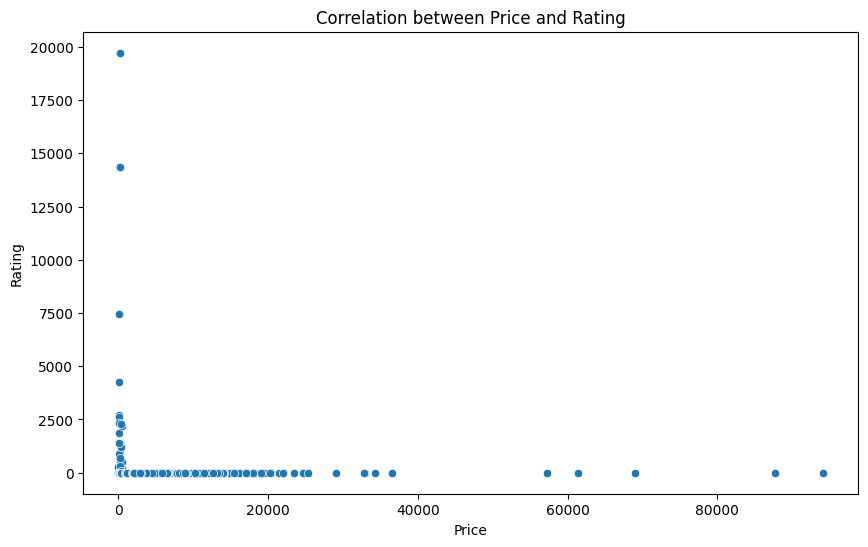

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='rating', data=df, palette="viridis")
plt.title('Correlation between Price and Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()


The scatter plot shows a weak correlation between the price of cosmetic products and their ratings. Most products with lower prices have a wide range of ratings, and there are fewer data points for higher-priced items. This suggests that price does not significantly impact ratings, and other factors might be influencing product ratings.


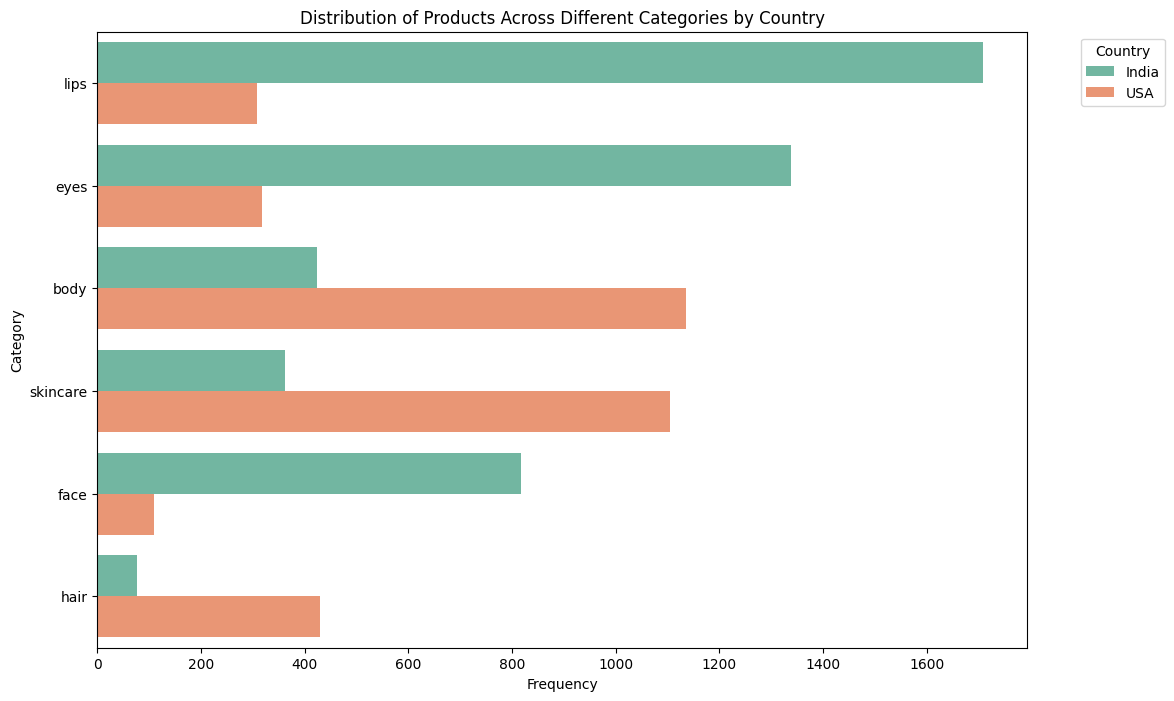

In [ ]:
# Distribution of products across different categories by country
plt.figure(figsize=(12, 8))
sns.countplot(y='category', hue='country', data=df1, 
              order=df1['category'].value_counts().index, palette="Set2")
plt.title('Distribution of Products Across Different Categories by Country')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The bar chart compares the distribution of cosmetic products across various categories (lips, eyes, body, skincare, face, hair) in two countries: India and the USA. It shows that India has a higher number of products in categories like lips and skincare, while the USA leads in categories like hair and body. This indicates differing market focuses and consumer preferences in the two countries.

C:\Windows\Temp\ipykernel_20160\1413309287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='country', data=df1, palette='Spectral', order=df1['country'].value_counts().index)


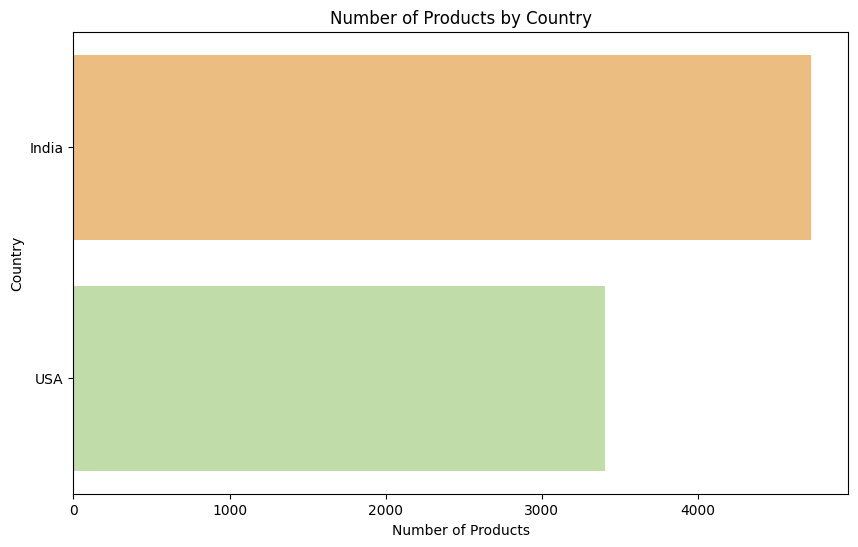

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='country', data=df1, palette='Spectral', order=df1['country'].value_counts().index)
plt.title('Number of Products by Country')
plt.xlabel('Number of Products')
plt.ylabel('Country')
plt.show()


The bar chart indicates that India has a greater number of cosmetic products overall compared to the USA. This could suggest a larger market or more diverse product offerings in India.

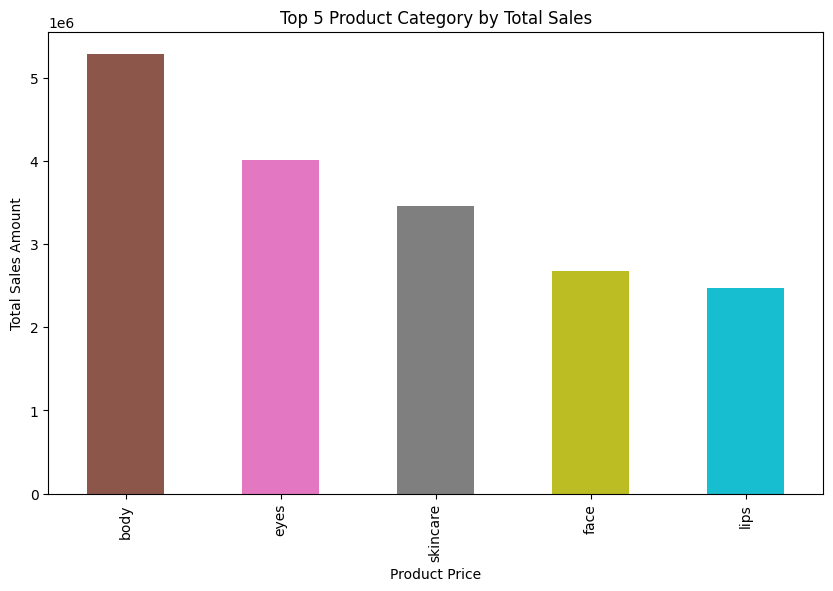

In [ ]:
# Find the top 5 product category by total sales amount
top_product_types = df1.groupby('category')['price'].sum().sort_values(ascending=False).head(5)
# Plotting the top 5 product types
plt.figure(figsize=(10, 6))
top_product_types.plot(kind='bar', color=colors)
plt.title('Top 5 Product Category by Total Sales')
plt.xlabel('Product Price')
plt.ylabel('Total Sales Amount')

plt.show()



The body category has the highest sales amount, surpassing all other categories by a significant margin.
Eyes and Skincare categories also perform well, indicating their popularity among consumers.
Face and Lips categories show moderate sales, indicating a steady demand but not as high as the top categories.

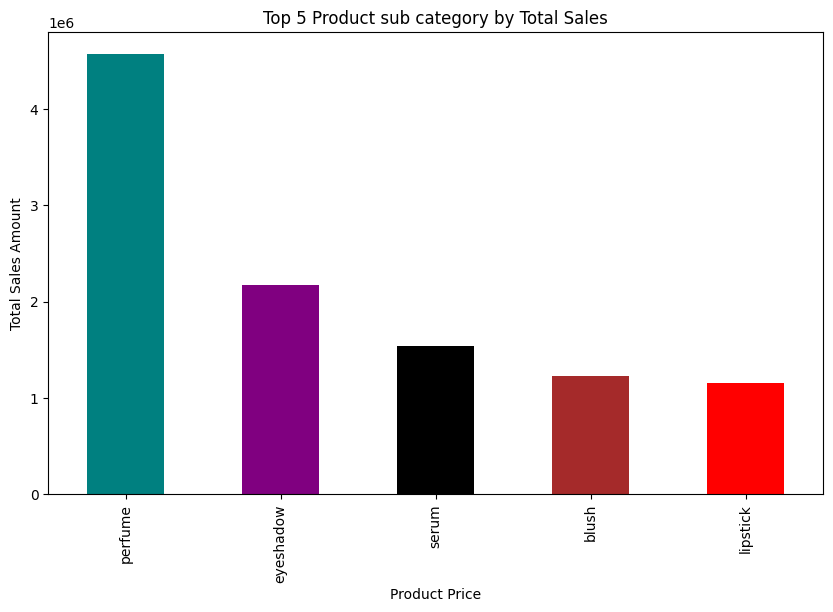

In [ ]:
# Find the top 5 product sub category by total sales amount
top_product_types = df1.groupby('subcategory')['price'].sum().sort_values(ascending=False)
# Plotting the top 5 product types
plt.figure(figsize=(10, 6))
top_product_types.plot(kind='bar', color=["Teal","purple","Black","brown","red"])
plt.title('Top 5 Product sub category by Total Sales')
plt.xlabel('Product Price')
plt.ylabel('Total Sales Amount')

plt.show()


A specific subcategory (possibly within the body category, given the color coding) dominates the sales, contributing significantly to overall revenue.
The other subcategories, while still important, generate noticeably lower sales compared to the top-performing subcategory.

In [ ]:
# Total Sales
Total_Sales=df1["price"].sum()
print(Total_Sales)

18821758.03


In [ ]:
#  total salesAccording to Product Category
sales_category= df1.groupby('category')['price'].sum().sort_values(ascending=False).head(5)

print(sales_category)

category
body        5289745.73
eyes        4007281.61
skincare    3459409.75
face        2673778.50
lips        2472049.32
Name: price, dtype: float64


In [ ]:
#  total sales According to Product Sub Category
sales_category= df1.groupby('subcategory')['price'].sum().sort_values(ascending=False).head(5)

print(sales_category)

subcategory
perfume      4571621.10
eyeshadow    2173159.27
serum        1539737.94
blush        1228510.11
lipstick     1155656.92
Name: price, dtype: float64


In [ ]:
#   Top rating According to Product Category
rating_products= df1.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print(rating_products)

category
skincare    4.383902
body        4.363310
hair        4.352623
lips        4.074442
eyes        4.056880
Name: rating, dtype: float64


In [ ]:
#   Top rating According to Product subcategory
rating_products= df1.groupby('subcategory')['rating'].mean().sort_values(ascending=False).head(5)
print(rating_products)

subcategory
mask         4.504412
face wash    4.474269
spray        4.473333
cleanser     4.465035
toner        4.441791
Name: rating, dtype: float64


In [ ]:
# low rating According to Product Category
rating_products= df1.groupby('category')['rating'].mean().sort_values(ascending=False).tail(5)
print(rating_products)

category
body    4.363310
hair    4.352623
lips    4.074442
eyes    4.056880
face    3.489030
Name: rating, dtype: float64


In [ ]:
#   Top rating According to Product subcategory
rating_products= df1.groupby('subcategory')['rating'].mean().sort_values(ascending=False).tail(5)
print(rating_products)

subcategory
concealer      3.480112
highlighter    3.420000
primer         3.375238
blush          3.362077
face oil       3.304375
Name: rating, dtype: float64


Final Conclusion:

1.The analysis of the product data reveals several key insights into the cosmetics market. The price distribution is notably skewed, with most products priced lower and a few significantly higher, indicating a diverse pricing strategy across the industry. Product category analysis shows that "lips" and "eyes" are the most represented, suggesting these areas dominate the market. Most products maintain high ratings, particularly in subcategories, reflecting overall customer satisfaction. However, the "face" category shows room for improvement with slightly lower average ratings.

2.Brand-wise, Sephora Collection leads with the most extensive product line, followed by other well-known brands like Anastasia Beverly Hills and Too Faced. The preference for liquid products over other forms like cream and stick highlights a trend in consumer choices.

3.A weak correlation between price and ratings suggests that factors other than price play a significant role in customer satisfaction. Geographical analysis shows differing market focuses between India and the USA, with India having a larger number of products overall, particularly in the "lips" and "skincare" categories.


4.Sales data reveal that the body category significantly outperforms other categories, indicating a strong consumer demand in this segment. Eyes and skincare categories also contribute substantial revenue, underscoring their popularity. In contrast, the face and lips categories, while still showing steady demand, generate more moderate sales figures. Notably, within the body category, a specific subcategory dominates sales, suggesting that brands should focus on expanding offerings and marketing efforts in this area to capitalize on consumer interest.

In conclusion, while the cosmetics market shows strong customer satisfaction and diverse product offerings, there are opportunities for growth. Improving product quality in underperforming categories, leveraging consumer trends, and focusing on high-revenue subcategories can drive higher market penetration and revenue generation.